<a href="https://colab.research.google.com/github/pedrofamaral/Panda-Python/blob/main/Tarefa%205.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando dataset

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling_2.csv'
df = pd.read_csv(url)

print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00            1.0          1             1.0   
1       1   83807.86            1.0          0             1.0   
2       8  159660.80            3.0          1             0.0   
3       1       0.00            2.0          0             0.0   
4       2  125510.82            1.0          1             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Eliminar os dados faltantes IsActiveMember e NumOfProjects

In [8]:
df = df.dropna(subset=['IsActiveMember'])
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)

<ipython-input-8-d861b2638778>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)


Transformando a coluna em variavel numerica


In [11]:
X = df.iloc[:, 3:-1]

y = df['Exited']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

Transformar a variavel Geography em booleana


In [12]:
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

print(X.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00            1.0          1   
1          608       0   41       1   83807.86            1.0          0   
2          502       0   42       8  159660.80            3.0          1   
3          699       0   39       1       0.00            2.0          0   
4          850       0   43       2  125510.82            1.0          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
0             1.0        101348.88              False            False  
1             1.0        112542.58              False             True  
2             0.0        113931.57              False            False  
3             0.0         93826.63              False            False  
4             1.0         79084.10              False             True  


Treinando e padronizando a maquina


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print ((X_train[:5], X_test[:5], y_train[:5]))

(array([[ 0.19497489, -1.0978349 , -0.08560471, -0.35091531,  0.68773897,
         0.79288874,  0.64266544,  0.97013464,  0.17292812, -0.57791562,
        -0.57421513],
       [ 0.30923058,  0.91088378,  1.92559446, -0.35091531,  0.73841401,
        -0.90841645, -1.55601957,  0.97013464,  0.68853324, -0.57791562,
        -0.57421513],
       [-0.77100505,  0.91088378, -1.0433186 ,  0.68782175, -1.23244975,
        -0.90841645,  0.64266544, -1.03078476,  0.7424895 , -0.57791562,
         1.74150759],
       [ 2.06461349,  0.91088378, -1.0433186 ,  1.03406744, -0.14671333,
         0.79288874,  0.64266544,  0.97013464,  1.62752054, -0.57791562,
        -0.57421513],
       [ 1.233663  ,  0.91088378,  0.58479501, -0.35091531,  0.54553836,
        -0.90841645,  0.64266544, -1.03078476, -1.29095739,  1.73035642,
        -0.57421513]]), array([[ 1.19211548,  0.91088378,  0.39325224,  0.34157606,  0.56676461,
         0.79288874,  0.64266544,  0.97013464, -1.10789752,  1.73035642,
        -0.

Fazendo o algoritmo de regressao logistica

Acurácia da Regressão Logística:  0.8129755706848217
Matriz de Confusão Regressão Logística:
 [[1914   71]
 [ 396  116]]


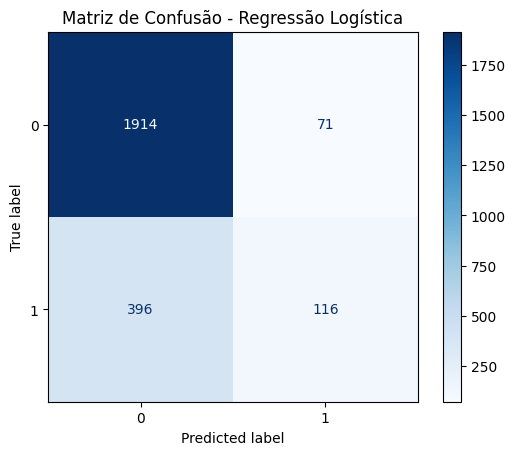

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accLR = accuracy_score(y_test, y_pred)

print("Acurácia da Regressão Logística: ", accLR)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão Regressão Logística:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

Fazendo o algoritmo KNN - K-Nearest Neighbors

Melhor acurácia do KNN:  0.8313976772126552 , melhor K:  23
Matriz de Confusão knn:
 [[1952   33]
 [ 397  115]]


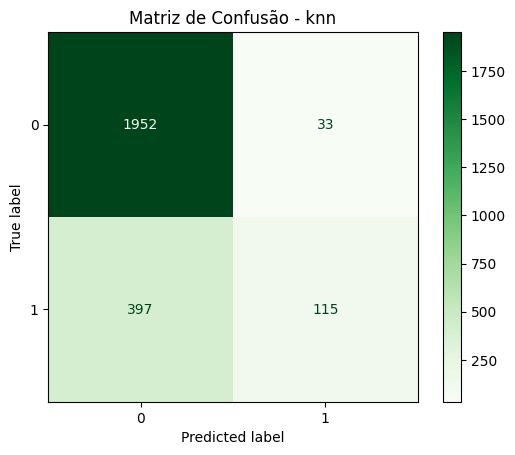

In [16]:
from sklearn.neighbors import KNeighborsClassifier


accKNN = 0
bestK = 0

for k in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    tempacc = accuracy_score(y_test, y_pred)
    #print(tempacc, " K : ", k)

    if accKNN < tempacc :
        accKNN = tempacc
        bestK = k


print("Melhor acurácia do KNN: ", accKNN, ", melhor K: ", bestK)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão knn:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão - knn")
plt.show()

Fazendo o algoritmo SVM - Support Vector Machines

Kernel: linear, Acurácia: 0.7950
Kernel: rbf, Acurácia: 0.8526
Kernel: poly, Acurácia: 0.8466
Kernel: sigmoid, Acurácia: 0.6996
Melhor Kernel:  rbf , com Acurácia:  0.8526231477773328
Matriz de Confusão SVC:
 [[1626  359]
 [ 391  121]]


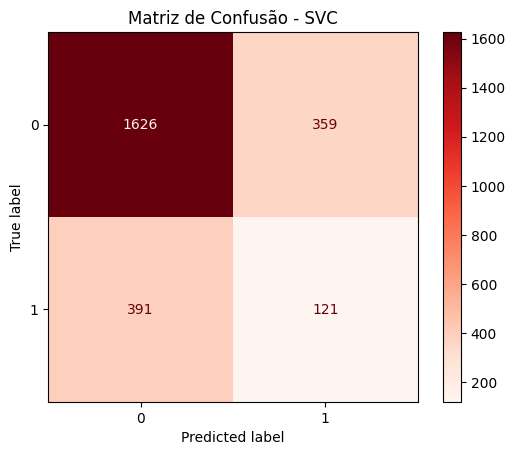

In [17]:
from sklearn.svm import SVC

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_kernel = None
accSVC = 0

for kernel in kernels:
    svc_model = SVC(kernel=kernel)
    svc_model.fit(X_train, y_train)

    y_pred = svc_model.predict(X_test)

    tempacc = accuracy_score(y_test, y_pred)

    print(f"Kernel: {kernel}, Acurácia: {tempacc:.4f}")

    if accSVC < tempacc:
        accSVC = tempacc
        best_kernel = kernel

print("Melhor Kernel: ",best_kernel , ", com Acurácia: ", accSVC)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão SVC:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_)
disp.plot(cmap='Reds')
plt.title("Matriz de Confusão - SVC")
plt.show()



Fazendo o algoritmo Random Forest

Melhor número de arvores:  46 , Acurácia do Random Forest:  0.8562274729675611
Matriz de Confusão random forest:
 [[1900   85]
 [ 279  233]]


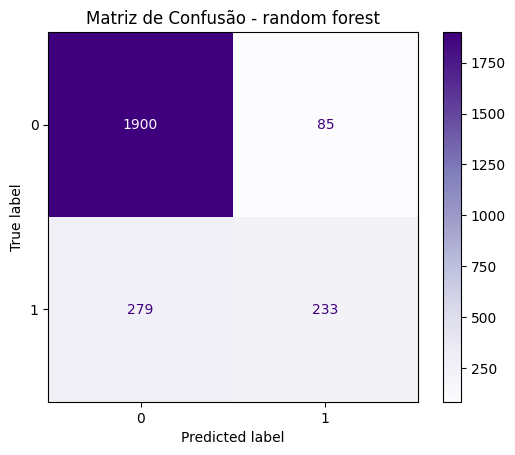

In [18]:
from sklearn.ensemble import RandomForestClassifier

best_n_tree = 0
accRF = 0

for tree in range(20, 50):

    rf_model = RandomForestClassifier(n_estimators=tree, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    tempacc = accuracy_score(y_test, y_pred)
    #print(f"numero de arvores: {tree}, Acurácia: {tempacc:.4f}")

    if accRF < tempacc:
        accRF = tempacc
        best_n_tree = tree


print("Melhor número de arvores: ", best_n_tree, ", Acurácia do Random Forest: ", accRF)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão random forest:\n", cm)

# Gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Purples')
plt.title("Matriz de Confusão - random forest")
plt.show()



Mostrando a taxa de acerto e a matriz de confusão de cada algoritmo de AM

In [19]:
print("desempenho Logistic Regression: ", accLR)
print("desempenho KNN: ", accKNN)
print("desempenho SVC: ", accSVC)
print("desempenho Random Forest: ", accRF)

max_acc = max(accLR, accKNN, accSVC, accRF)

if max_acc == accLR:
    print("Melhor desempenho: Logistic Regression com Acurácia de ", accLR)
elif max_acc == accKNN:
    print("Melhor desempenho: KNN com Acurácia de ", accKNN, "e N de ", bestK)
elif max_acc == accSVC:
    print("Melhor desempenho: SVC com Acurácia de ", accSVC, "e kernel ", best_kernel)
else:
    print("Melhor desempenho: Random Forest com Acurácia de ", accRF, "e número de arvores de", best_n_tree)


desempenho Logistic Regression:  0.8129755706848217
desempenho KNN:  0.8313976772126552
desempenho SVC:  0.8526231477773328
desempenho Random Forest:  0.8562274729675611
Melhor desempenho: Random Forest com Acurácia de  0.8562274729675611 e número de arvores de 46
